## Plotting with ggplot2: Part 1


[YouTube link](https://www.youtube.com/watch?v=HeqHMM4ziXA)

### Base System in R

- Start with a blank canvas and build up from there

- Start with a plot() function (or similar)

- Use annotation functions to add/modify (text, lines, points, axis)

U basicallly add things one by one

In the base system every plot is a series of R commands

### Lattice System in R

It is kind of like the opposite to the base system

- We create the entire plot with a single function call (xyplot, bwplot, etc)

- Most useful for conditioning types of plots : looking at how y changes with x across levels of z

- Things like margins/spacings are set automatically

- Good for putthing many plots on a screen
 
- A bit less intuitive than the base system

- Annotation is more complicated

- Once created we cannot "add" to the plot

### ggplot System in R

- Splits diff bw the other 2

- Preserves the approach of adding to a plot one by one

- Takes care of a lot of housekeeping like margins, spacing

- more intuitive than lattice


### Basics: qplot()

It is analogous to the plot() function in the base system

Data should ideally to be organized in a df



In [1]:
?mpg

In [2]:
library(ggplot2)

str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


There are 234 obs. of  11 variables

Note how manufacturer and trans vars are labeled appropriately

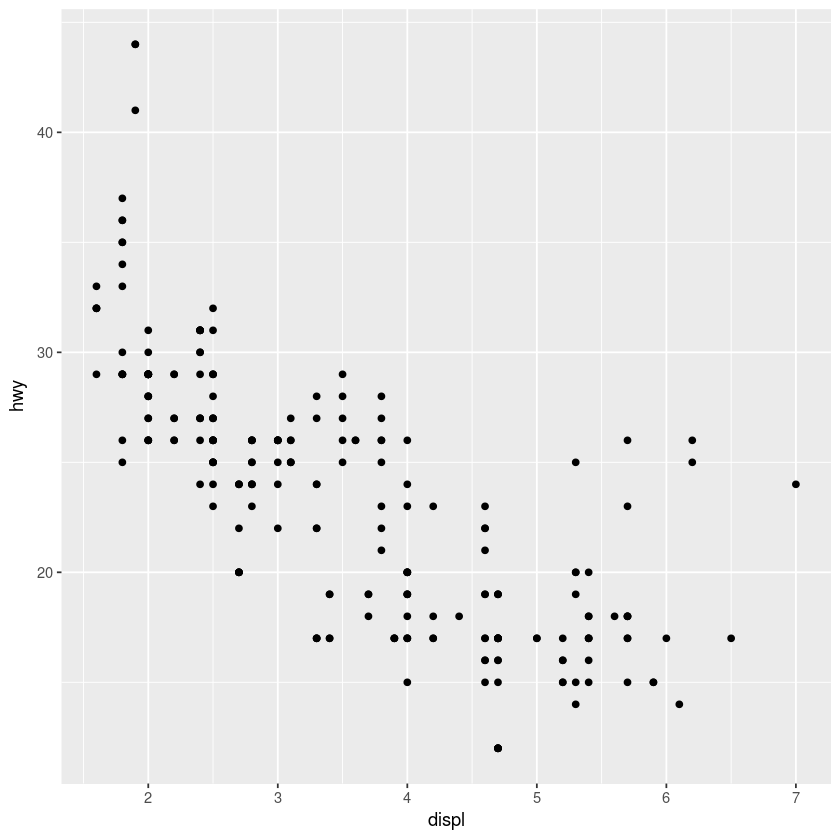

In [3]:
qplot(x = displ, y = hwy, data = mpg)

Seperate the obs acc to the drv var (f = front-wheel drive, r = rear wheel drive, 4 = 4wd)

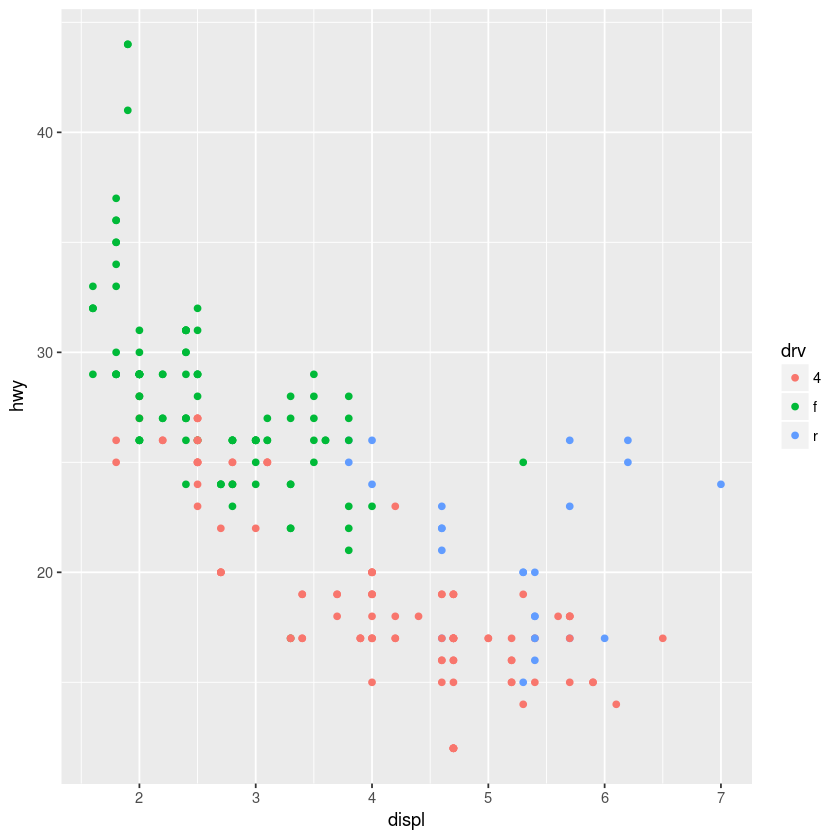

In [4]:
qplot(x = displ, y = hwy, data = mpg, color = drv)

Now diff levels of drv var is assigned a diff color. The color gets specified automatically and is quite pleasant to look at

- Most fw drive tend to have high mileage

- 4 wheel drv tend to have low mileage

- rear wheel drive is something in the middle

Legends are placed automatically



### Adding a geom

Geom is the geometric obj

So every plot: aesthetics(size, color...) + geoms(points, lines,...)

We might want to add another statistic to our plot

Here we want to add a **LOWESS**

LOWESS (Locally Weighted Scatterplot Smoothing), sometimes called LOESS (locally weighted smoothing), is a popular tool used in regression analysis that creates a smooth line through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

This will help us see the overall trend bw displacement and hwy milage

`geom_smooth()` using method = 'loess'


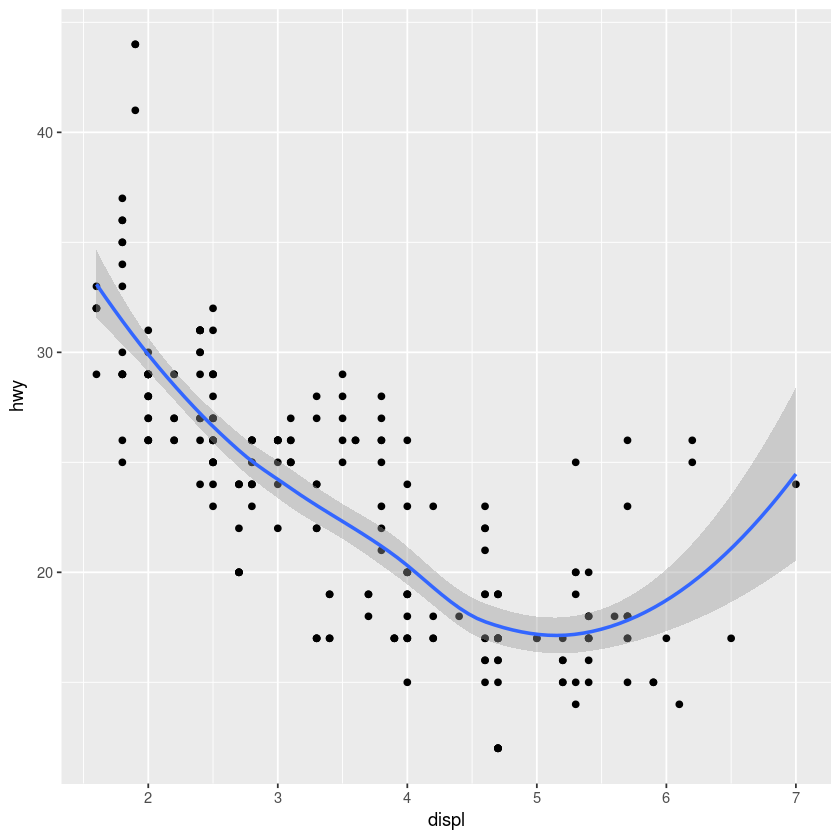

In [5]:
qplot(x = displ, y = hwy, data = mpg, geom = c("point", "smooth"))

The 95% confidence intervals for the line are indicated by the grey zone

Not if there are many possible values for hwy given displ, the grey width is very less, as it is less confident


### Histograms using qplot

We can plot hist with qplot() by specifying only one var

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


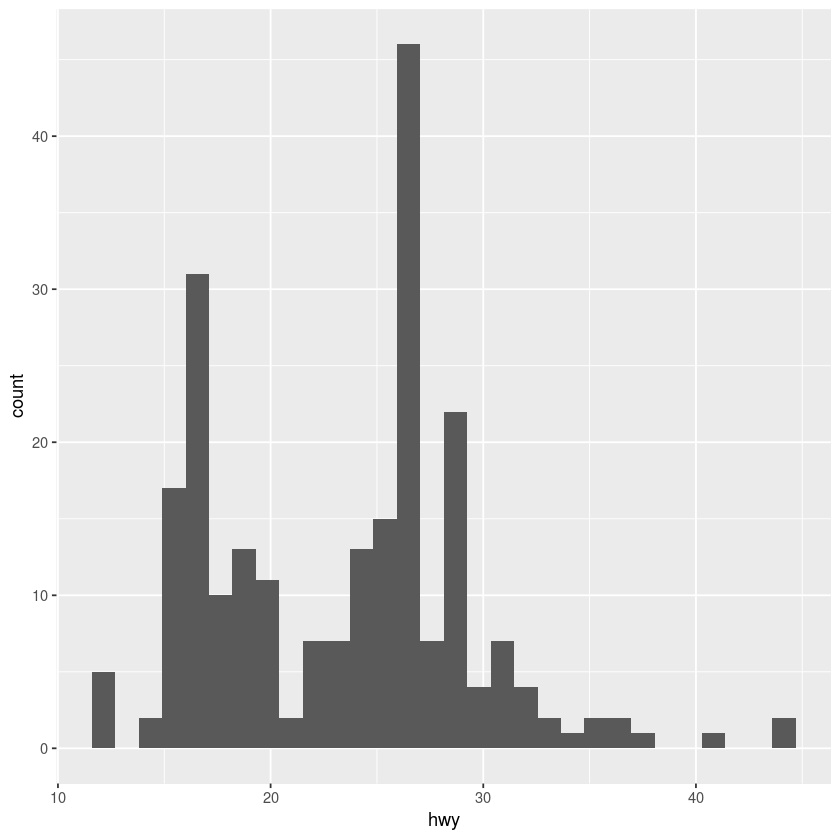

In [6]:
qplot(hwy, data = mpg)

We can see the drv types as well

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


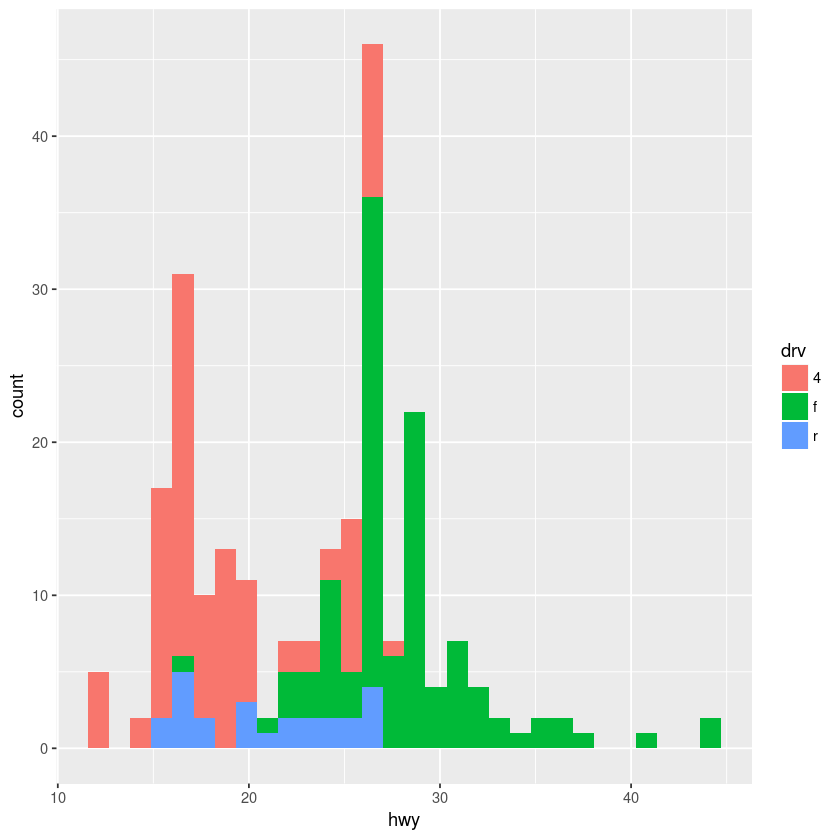

In [7]:
qplot(hwy, data = mpg, fill = drv)

Now diff levels of drv var is assigned a diff color. The color gets specified automatically and is quite pleasant to look at

- Most fw drive tend to have high mileage

- 4 wheel drv tend to have low mileage

- rear wheel drive is something in the middle

### Facets

We can create separate plots which indicate subsets of our data and u can create a panel of plots to look at several subsets together

Now we saw how we can do something similar by color coding the diff categories

But of we have a lot of data pts, it might look clumsy

So we split out the 3 groups in separate panels and create 3 sep plots

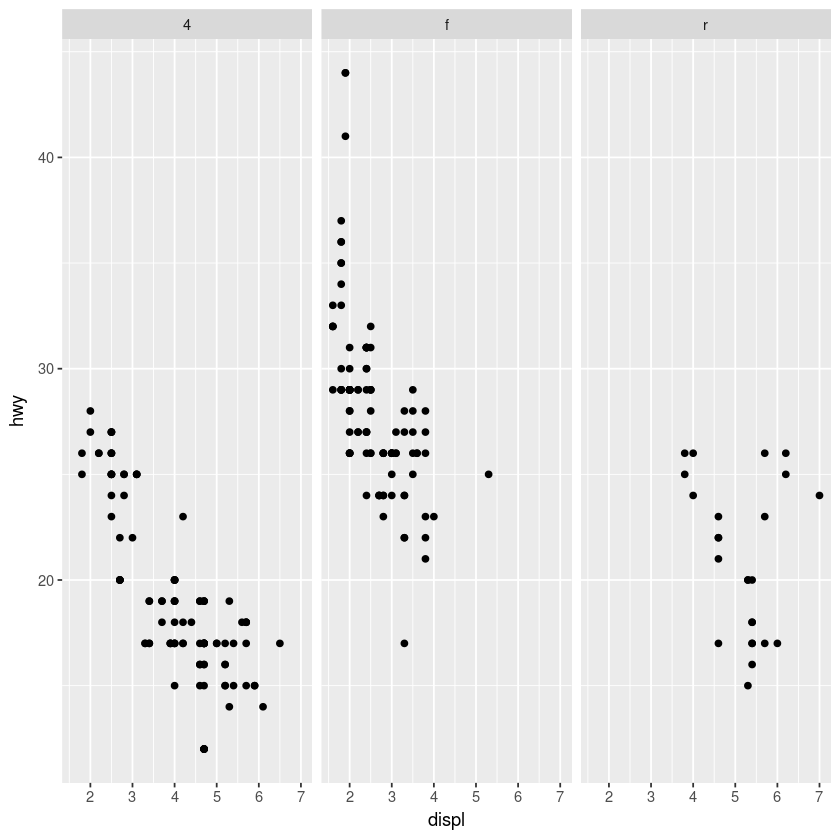

In [8]:
qplot(x = displ, y = hwy, data = mpg, facets = .~drv)